<a href="https://colab.research.google.com/github/adriseeney/mlpredictprojects/blob/main/Startups_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Startup Profit Prediction



---



Author: Adrianna Seeney

Email: adriseeneymba@gmail.com

LinkedIn: https://www.linkedin.com/in/aseeney



---



This project is on Linear Regression. I will use the 1000 companies dataset from kaggle https://www.kaggle.com/datasets/rupakroy/1000-companies-profit


---



# Context

---



This model uses Linear Regression to predict a company's profit based on its spending on Research and Development (R&D), Administration, and Marketing. The training data includes these spending figures and the profits of different companies.

After analyzing the data, the model has learned how R&D, Administration, and Marketing spending relate to a company's profit. With this understanding, it can make predictions when given new data. The model is helpful for investors looking to assess the potential success of startup investments, providing insights into the expected return on capital expenditures for upcoming ventures.

# Imports


In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for building linear regression model
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


# Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/ML Projects/1000_Companies.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


**Observations**

The profit of the startup indicated by the variable Proft is the target variable and the rest are the independent variables based on which we will predict the profit as a function of spend.

In [ ]:
for col in df:
  print(df['State'].unique())

['New York' 'California' 'Florida']
['New York' 'California' 'Florida']
['New York' 'California' 'Florida']
['New York' 'California' 'Florida']
['New York' 'California' 'Florida']


We have three different states in the data frame. I will assign each of these states a float value.

In [ ]:
print(df.State.value_counts())

California    344
New York      334
Florida       322
Name: State, dtype: int64


In [ ]:
# df.replace({'State':{'New York':0,'California':1,'Florida':2}},inplace=True)
# df

In [ ]:
df. describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


**Observation: **I can see there is a large range of values in the data frame. Next, I want to see the distribution of values and see if there are any outliers that could skew our data set.

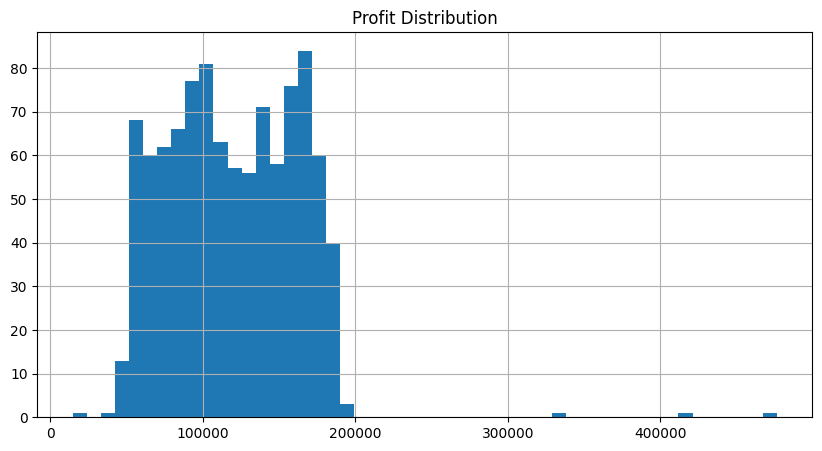

In [ ]:
df['Profit'].hist(bins=50,figsize=(10,5))
plt.title('Profit Distribution')
plt.show()

In [ ]:
# a function to drop
def drop_outliers(train,columns):
    iqr=1.5*(np.percentile(train[columns],75)-np.percentile(train[columns],25))
    df.drop(train[train[columns]>(iqr+np.percentile(train[columns],75))].index,inplace=True)
    df.drop(train[train[columns]<(np.percentile(train[columns],25)-iqr)].index,inplace=True)
df.shape

(1000, 5)

<Axes: >

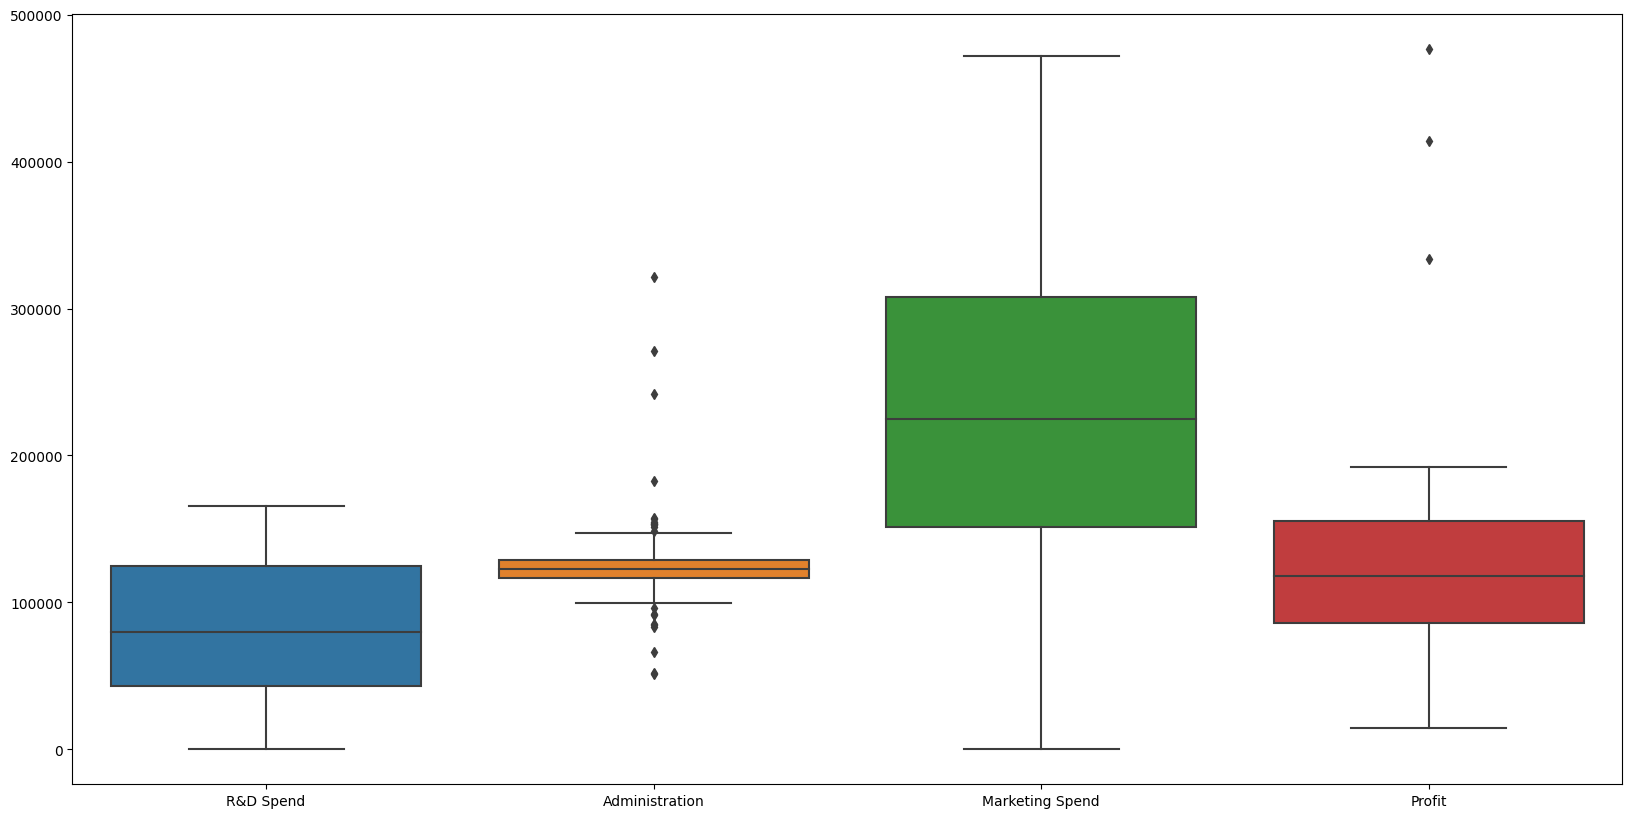

In [ ]:
# visualizing the outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [ ]:
drop_outliers(df,"Profit")
drop_outliers(df,"Administration")

<Axes: >

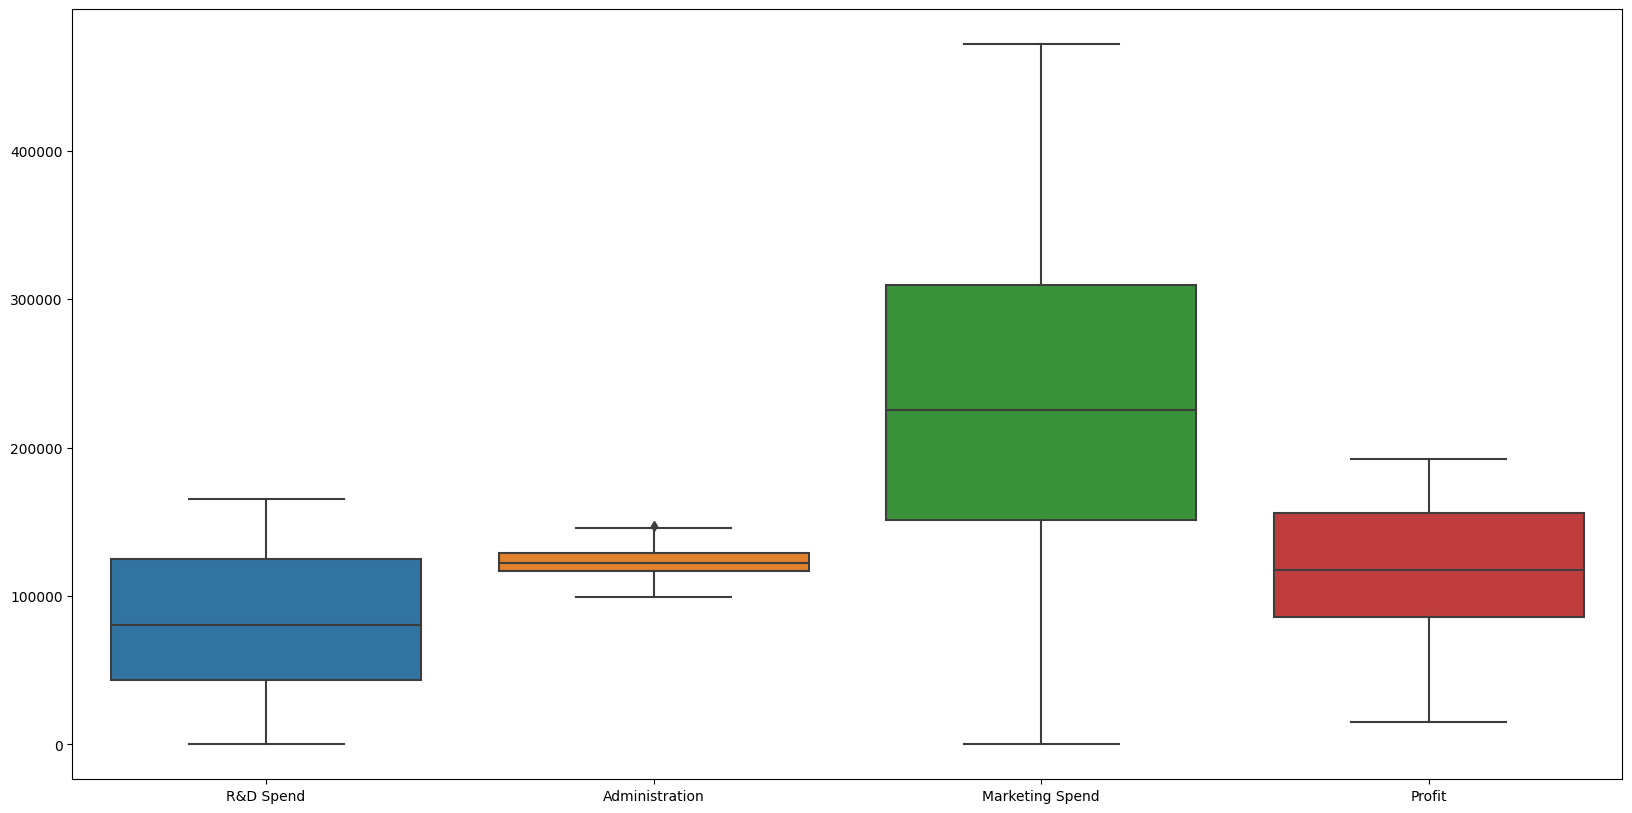

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

## Is there a relationship between spend and profits?

In [ ]:
df['total_spend'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']

<Axes: xlabel='total_spend', ylabel='Profit'>

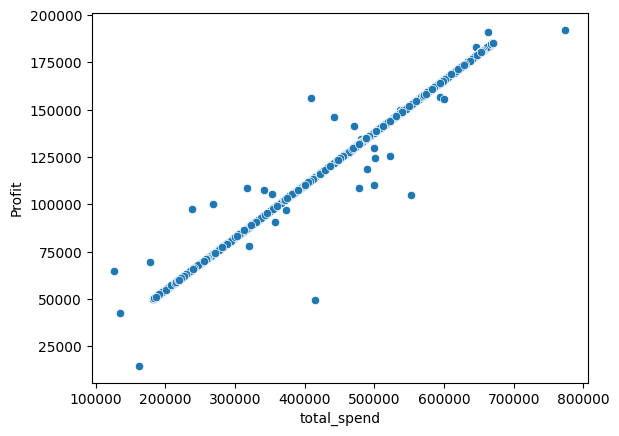

In [ ]:
sns.scatterplot(x='total_spend', y='Profit', data=df)

<ipython-input-19-fa54caadb05d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-19-fa54caadb05d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

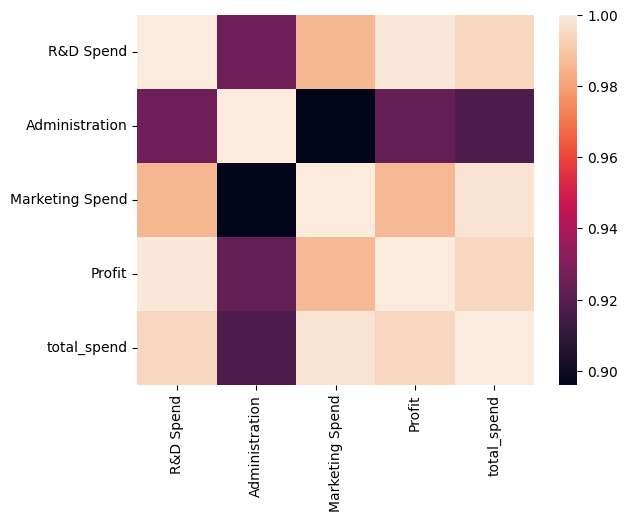

In [ ]:
df.corr()
sns.heatmap(df.corr())

## Least Squares Line

<Axes: xlabel='total_spend', ylabel='Profit'>

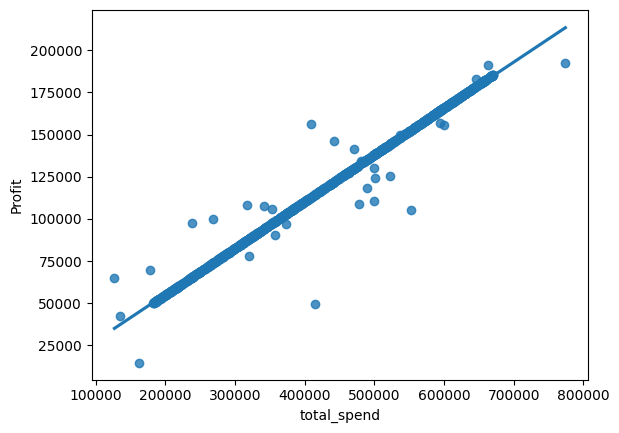

In [ ]:
sns.regplot(x='total_spend', y='Profit', data=df)

## Finding the equation of the linear regression model

Known matrix of labels y = Profit
Known matrix of labels X = Total Spend

In [ ]:
# Set x and y matrix
X = df['total_spend']
y = df['Profit']

In [ ]:
# return the highest order coefficient
coef = np.polyfit(X,y,deg=1)

In [ ]:
# Potential future spend budgets in relation to expected profits
potential_spend = np.linspace(min(y),max(y),25000)

In [ ]:
# use the m & b coefficients to create the model array([ m = 2.81342697e-01, b = -1.66692729e+03]) > label as Beta1, Beta0
#m
b1 = coef[0] # m
b0 = coef[1] # b
print(b1, b0)

0.27561319553514163 74.81881303832107


## Visualizing the model

Text(0.5, 0, 'Spend')

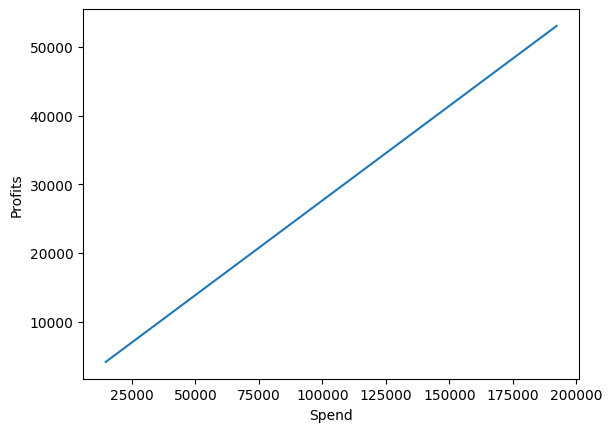

In [ ]:
predicted_profits = b1 * potential_spend + b0
plt.plot(potential_spend,predicted_profits)
plt.ylabel('Profits')
plt.xlabel('Spend')

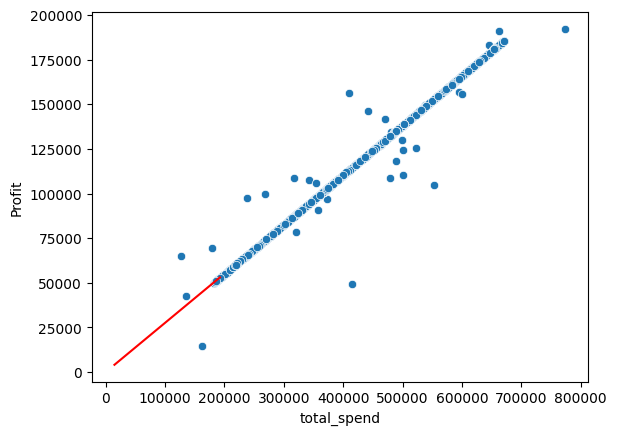

In [ ]:
sns.scatterplot(x='total_spend', y='Profit', data=df)
plt.plot(potential_spend, predicted_profits, color='red')

## Checking the model

In [ ]:
spend = 44000
potential_profit = b1 * spend + b0
potential_profit

12201.799416584552

Lets determine if this is a good prediction model for profits to undertand if we're underfitting or overfitting.

In [ ]:
# passing in X,y, with a 3rd polynomial degree
# y = B3x**3 + B2x**2 + B1x + B0
np.polyfit(X,y,3)

array([-8.92896003e-14,  1.20857467e-07,  2.24509496e-01,  6.68046506e+03])

In [ ]:
potential_spend = np.linspace(50000,1000000,25000)
predicted_profits = 4.92333577e-13*potential_spend**3 + -5.41328631e-07*potential_spend**2 + 4.55006217e-01*potential_spend + -1.73414649e+04

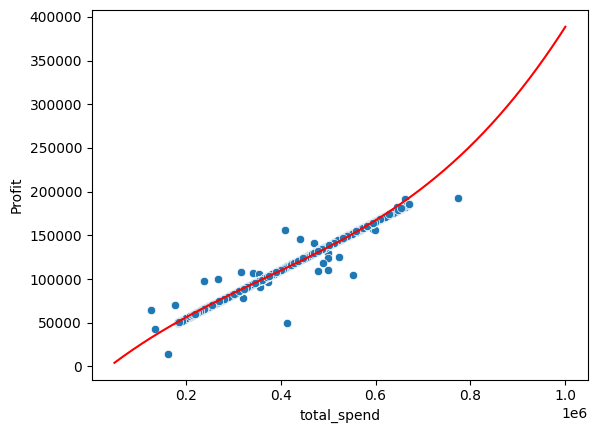

In [ ]:
sns.scatterplot(x='total_spend', y='Profit', data=df)
plt.plot(potential_spend, predicted_profits, color='red')

# What is the relationship between Spend and Profits of the firm?

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'total_spend'],
      dtype='object')

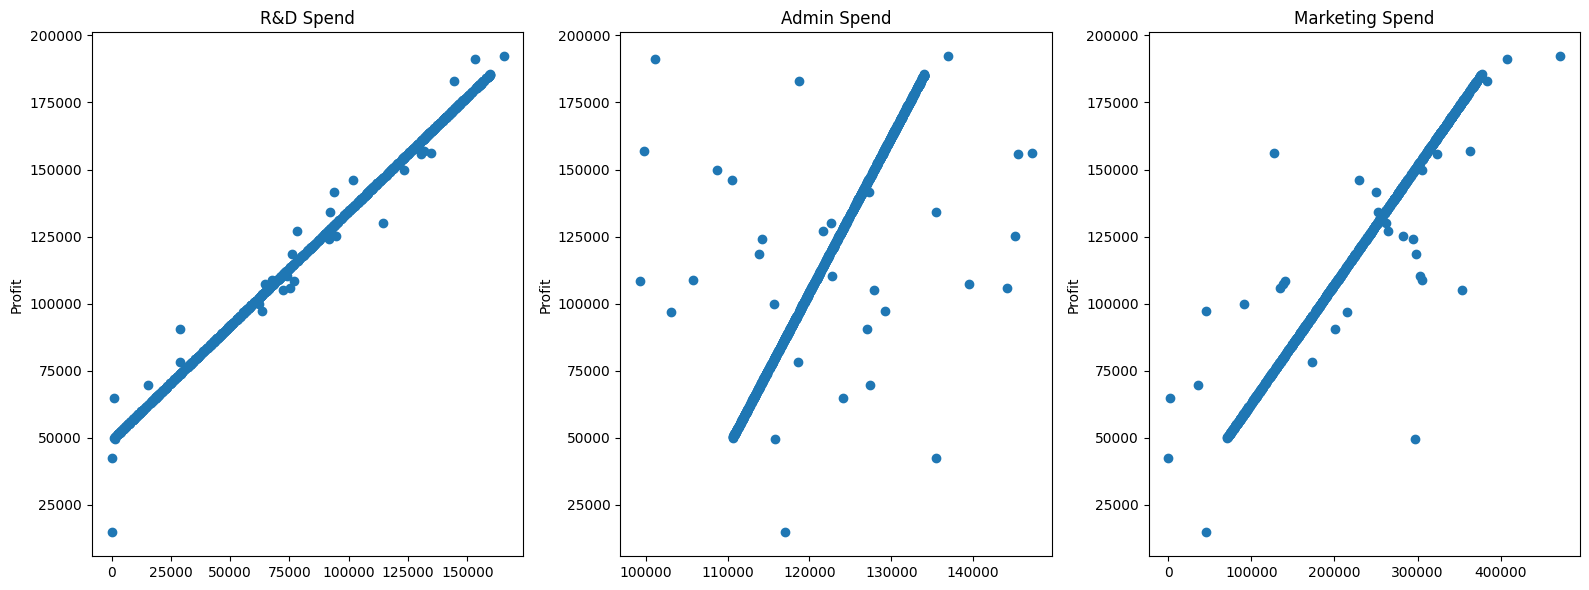

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['R&D Spend'],df['Profit'],'o')
axes[0].set_ylabel("Profit")
axes[0].set_title("R&D Spend")

axes[1].plot(df['Administration'],df['Profit'],'o')
axes[1].set_title("Admin Spend")
axes[1].set_ylabel("Profit")

axes[2].plot(df['Marketing Spend'],df['Profit'],'o')
axes[2].set_title("Marketing Spend");
axes[2].set_ylabel("Profit")
plt.tight_layout();

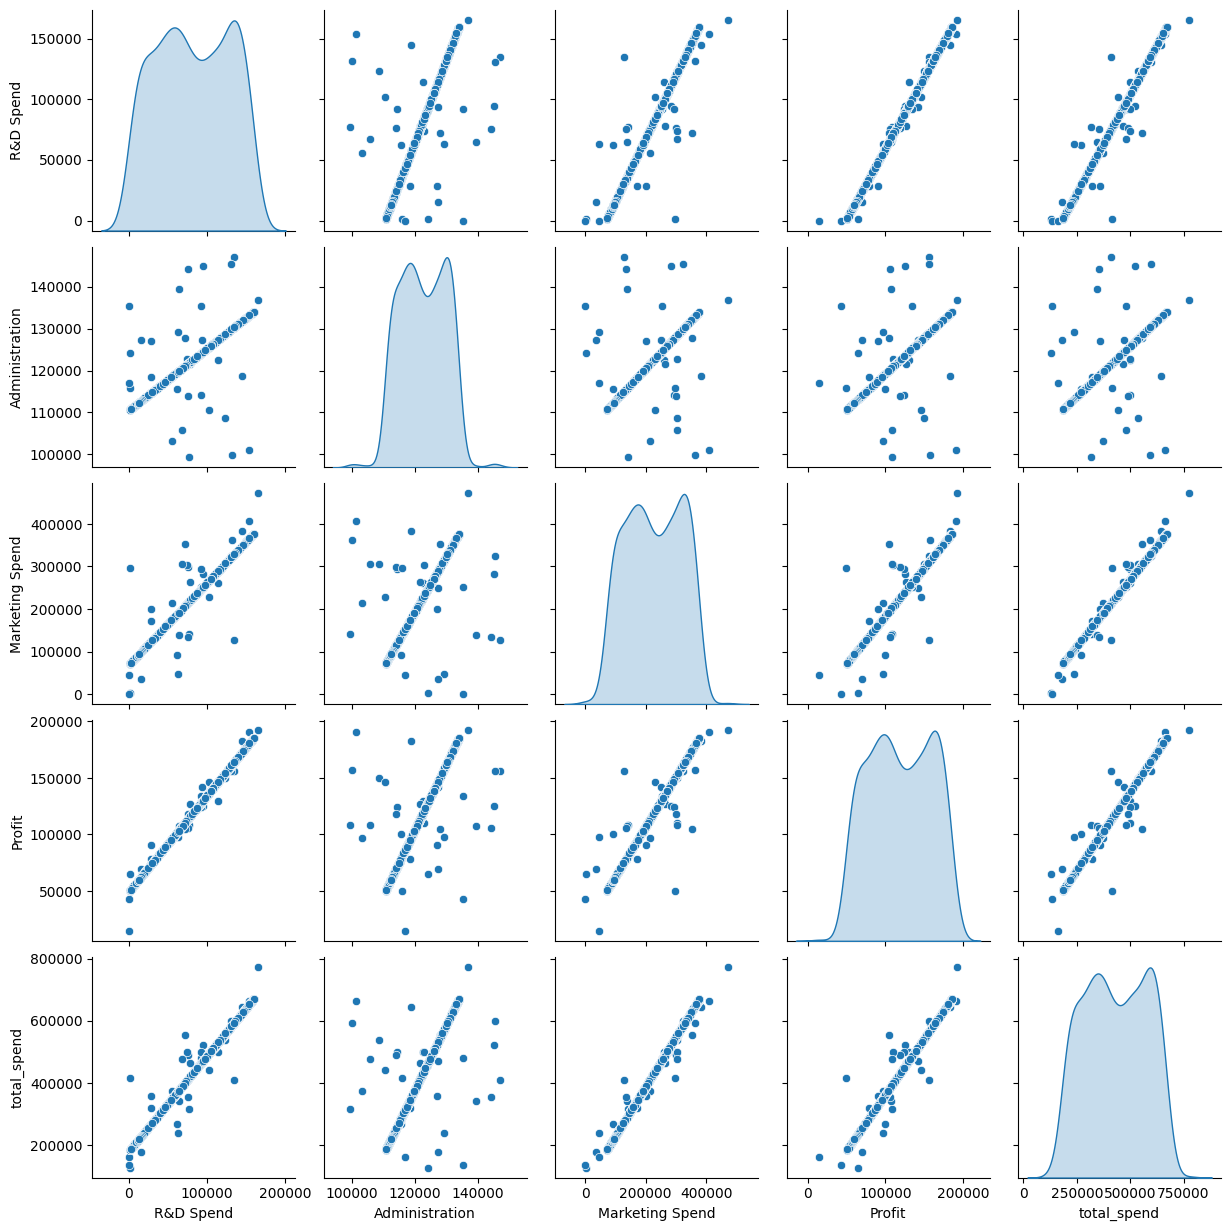

In [ ]:
# Relationships between features
sns.pairplot(df, diag_kind='kde', )

### Extract Independent and Dependent Variables

In [ ]:
# Set x and y matrix
X = df.drop(columns =['State', 'Profit']) # Feature array
y = df['Profit'] # y vector label - Target array

In [ ]:
X

,R&D Spend,Administration,Marketing Spend,total_spend
0,165349.20,136897.8000,471784.1000,774031.1000
2,153441.51,101145.5500,407934.5400,662521.6000
3,144372.41,118671.8500,383199.6200,646243.8800
5,131876.90,99814.7100,362861.3600,594552.9700
6,134615.46,147198.8700,127716.8200,409531.1500
...,...,...,...,...
992,105127.00,125982.7298,271621.8728,502731.6026
993,46798.00,117368.4374,159075.9080,323242.3454
994,97209.00,124813.3635,256344.0701,478366.4336
995,54135.00,118451.9990,173232.6695,345819.6685


### Splitting the data into Train - Test Split
To fairly evaluate my model peformance, I dont want to evaluate it on the same data it was trained on.

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df[["R&D Spend", "Administration", "Marketing Spend"]], df["Profit"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
X_train

,R&D Spend,Administration,Marketing Spend
703,57750.0,118985.8787,180207.82190
762,27654.0,114541.1643,122137.50770
505,72494.0,121163.3397,208656.41010
906,80987.0,122417.6247,225043.67680
720,40501.0,116438.4678,146925.82930
...,...,...,...
553,147916.0,132302.0043,354183.36510
603,13316.0,112423.6631,94472.29754
512,112421.0,127059.9410,285695.66570
546,34087.0,115491.2190,134549.99880


In [ ]:
y_train

703     98368.22581
762     72657.47271
505    110963.89780
906    118219.39440
720     83632.55396
           ...     
553    175396.26160
603     60408.64304
512    145073.18940
546     78153.12910
187     67199.40514
Name: Profit, Length: 684, dtype: float64

In [ ]:
X_test

,R&D Spend,Administration,Marketing Spend
951,11624.0,112173.7809,91207.57892
162,66303.0,120249.0247,196710.85870
483,29076.0,114751.1717,124881.26060
224,22390.0,113763.7528,111980.60530
446,48599.0,117634.4173,162550.94240
...,...,...,...
312,84406.0,122922.5582,231640.64670
145,121139.0,128347.4549,302517.07050
330,50634.0,117934.9554,166477.48050
182,86080.0,123169.7821,234870.63420


In [ ]:
y_test

951     58963.18204
162    105674.97990
483     73872.27504
224     68160.48294
446     90550.60548
           ...     
312    121140.21660
145    152520.90150
330     92289.08842
182    122570.30040
130    129804.43970
Name: Profit, Length: 294, dtype: float64

### Fitting linear regression model to the training set

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# create linear regression object
regressor = LinearRegression()

In [ ]:
# train the model using the training sers
regressor.fit(X_train,y_train)

LinearRegression()

### Prediciting the test set results

In [ ]:
y_predict = regressor.predict(X_test)
y_predict

array([ 59092.47226083, 105750.34092175,  73984.35257387,  68279.15478755,
        90643.42772144, 129690.66833997, 114438.69327836, 168249.81845544,
       154370.81126908, 103233.9442278 ,  94382.61059646, 173333.81014291,
        60496.15912373, 162193.05896987,  74008.24511965, 108701.92320039,
        95347.6986408 ,  59354.43691642,  63786.5035208 ,  51394.80710019,
       129528.54037767, 142527.79001865, 152941.52525875, 181916.35267757,
        97323.9532223 ,  88743.97060671, 164338.26795056, 149502.70576863,
       141506.38383659, 114850.14528473,  89065.66661569, 144835.980268  ,
        77126.22188712, 146953.03018247,  53784.91463573, 151173.47712447,
       130117.32088196,  92993.42992393,  94489.27373347, 166603.79294911,
       158580.16524587, 116555.74319283,  90257.73382624, 167261.69116904,
       155899.08067925, 110433.27921703,  80150.33510683, 103069.25634906,
        71832.31715711, 138909.77646785, 109415.28625169, 115114.31721017,
       184616.20995791,  

### Calculating the coefficients and intercepts

In [ ]:
print("Coefficients: \n", regressor.coef_)

Coefficients: 
 [0.78968201 0.08698176 0.02631622]


In [ ]:
print(regressor.intercept_)

37755.89718883614


The coefficients and intercepts in a linear regression model hold significant importance for business outcomes. These two metrics provide businesses with a quantitative understanding in the following ways:

1. **Coefficient Significance:**
   - **Direction and Magnitude of Influence:** Coefficients represent the weights assigned to each predictor variable in the linear equation. The sign (positive or negative) indicates the direction of influence regarding how the variables relate to each other, while the magnitude reflects the strength of that influence. Understanding these coefficients helps businesses identify which factors have the most substantial impact on the dependent variable.

   - **Strategic Decision-Making:** Businesses can use coefficient values to make strategic decisions. For instance, positive coefficients may suggest that increasing a particular input variable could lead to an increase in the output, while negative coefficients may imply an inverse relationship.

2. **Intercept Interpretation:**
   - **Baseline Prediction:** The intercept represents the predicted value of the dependent variable when all predictor variables are set to zero. This is often meaningful in business contexts, providing a baseline or starting point for predictions.

   - **Business Baseline:** In business scenarios, the intercept can represent a baseline condition or the expected outcome when no specific influencing factors are in play. This is valuable for understanding the inherent baseline performance or value of a business process.

3. **Model Accuracy and Prediction:**
   - **Model Calibration:** Coefficients contribute to the overall calibration of the model. A well-calibrated model, with accurately estimated coefficients, is more likely to provide reliable predictions. Calibration refers to the process of ensuring that the predictions made by the model align closely with the actual observed outcomes

   - **Forecasting Business Metrics:** By understanding the coefficients, businesses can make informed predictions about future outcomes. For instance, in sales forecasting, the coefficients can indicate how changes in marketing expenditure or product pricing may impact sales.

4. **Risk Management:**
   - **Identification of Influential Factors:** Coefficients highlight the factors that significantly contribute to the variability in the dependent variable. This insight is crucial for risk management, allowing businesses to focus on mitigating risks associated with influential factors.

   - **Sensitivity Analysis:** Businesses can conduct sensitivity analyses on coefficients to assess the impact of variations in predictor variables on the dependent variable. This helps in identifying areas where the model predictions are most sensitive and require careful monitoring.

In summary, the coefficients and intercepts in a linear regression model serve as interpretable parameters that enable businesses to understand, interpret, and leverage the relationships between variables for improved decision-making, strategic planning, and risk management.

# Understanding and Evaluating the Model

Evaluation metrics:
* Mean Absolute Error (MAE) | comparing the error between my prediction and the true value. absolute error of the difference between y-hat from the true value. Constraint is doesnt take into full account where we have large errors for just a few points. This is where MSE comes
* Mean Squared Error (MSE) | Squaring the error difference. Will increase the overall effect on the aeverage of the few points that are far off. Constraint is this reports back the Y in squared values. This is where RMSE comes in!
* Root Mean Squared Error (RMSE) | Similar to a standard deviation. Accounts for the larger errors by squaring them and recounts the issue of squaring the Y values.

Comparing these metrics:


The Mean Absolute Error (MAE) stands out as a comprehensible metric, embodying the simplicity of assessing average errors. However, the field predominantly gravitates towards the Mean Squared Error (MSE), as it penalizes larger errors, aligning with practical considerations in real-world scenarios. Further enhancing the rigor of error evaluation is the Root Mean Squared Error (RMSE), esteemed for its interpretability in the context of dependent variable units ('y'). These metrics, categorized as loss functions, are integral to model assessment, as the overarching objective is the minimization of these measures to optimize predictive accuracy and, consequently, bolster business outcomes.

In [ ]:
# Set evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,y_predict) # comparing the error between my prediction and the true value. absolute error of the difference between y-hat from the true value.
MAE


412.08158860308816

In [ ]:
MSE = mean_squared_error(y_test,y_predict)
MSE


6513790.031160514

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

2552.2127715299353

In [ ]:
# The coefficient of determination
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9959651528160592

In [ ]:
# plot outputs


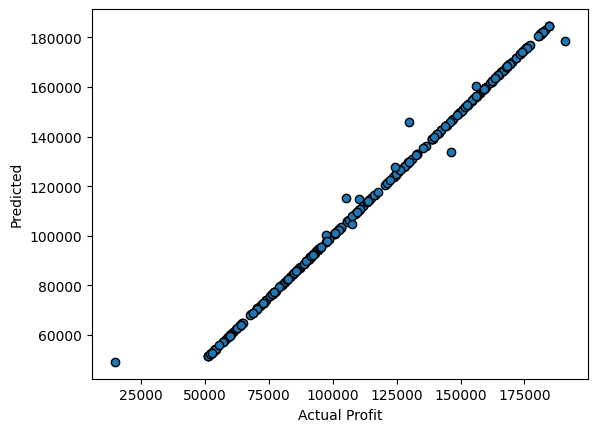

In [ ]:
plt.scatter(y_test, y_predict, edgecolors=(0,0,0))
plt.xlabel("Actual Profit")
plt.ylabel("Predicted")
plt.show()

In [ ]:
# Profits mean / target variable mean to fairly and intuitvely evaluate the model
df['Profit'].mean()

118919.52857424333

<Axes: xlabel='Profit', ylabel='Count'>

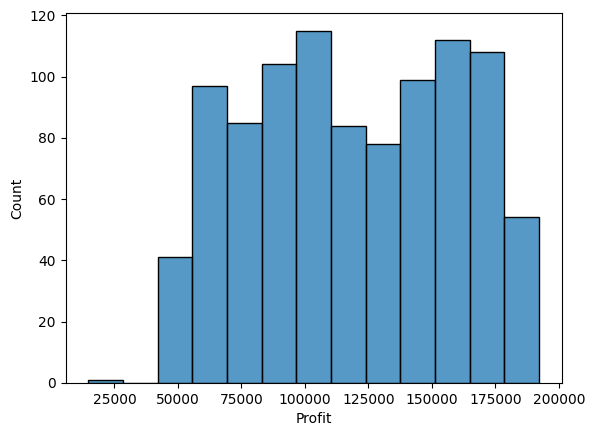

In [ ]:
sns.histplot(data=df,x='Profit' )

In [ ]:
# plot residuals against y test values
test_residuals = y_test - y_predict
# test_residuals

(-34438.73810538521, 12591.381060650048)

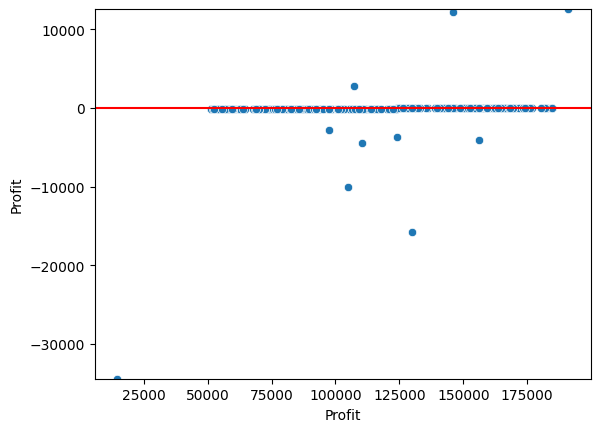

In [ ]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r')
plt.ylim(min(test_residuals), max(test_residuals))

There's a strong outlier of -35,000. Considering the fact this dataset concerns large profit and spend numbers, the scale of the above visualization might be telling a misleading story.

Below, I changed the scale of the visualization to get a glimpse of the true story of the results.


---


An essential consideration in model construction pertains to the polarity of residuals—whether they exhibit a positive or negative nature. The scrutiny of residuals becomes imperative in instances where the predictive accuracy of the model is paramount. Specifically, in financial contexts, such as budgeting, profit forecasting, and revenue estimation, a strategic emphasis on the analysis of residuals is crucial. Within the realm of financial decision-making, the business interest lies in discerning and mitigating the implications of overestimation or underestimation. For operational efficiency, it is posited that a deliberate tendency towards underprediction may be advantageous.



(-100.0, 100.0)

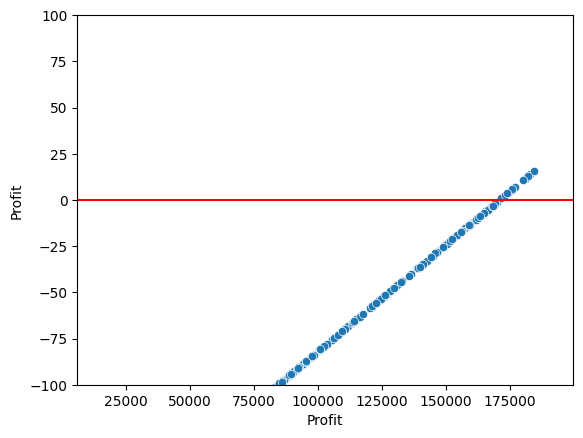

In [ ]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r')
plt.ylim(-100, 100)

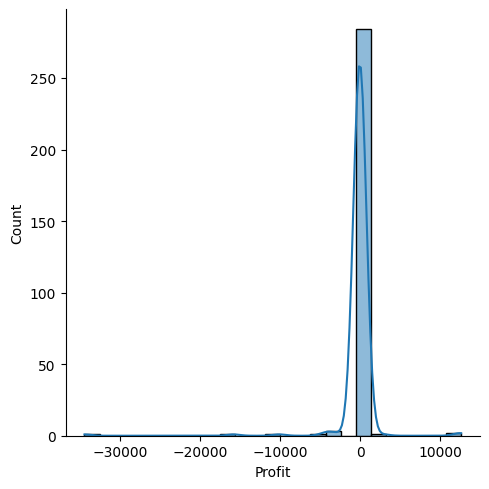

In [ ]:
sns.displot(test_residuals, bins=25, kde=True)

(-100.0, 100.0)

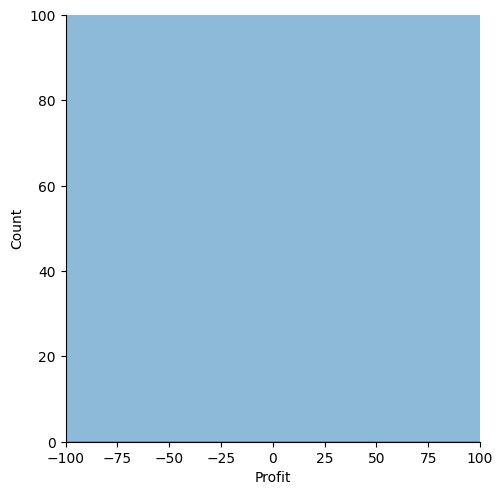

In [ ]:
sns.displot(test_residuals, bins=25, kde=True)
plt.ylim(0, 100)
plt.xlim(-100, 100)